In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_iris
import sklearn.metrics as metrics 

In [8]:
import mlgrad.loss as loss
import mlgrad.funcs as funcs
import mlgrad.models as models

import mlgrad.regr as regr
import mlgrad.plots as plots

In [2]:
X, Y = load_iris(return_X_y=True)
print(X.shape, Y.shape)

(150, 4) (150,)


In [3]:
from sklearn.decomposition import PCA
pca = PCA(2)
U = pca.fit_transform(X)

In [4]:
Y12 = Y[Y != 0]
Y12[Y12 == 2] = -1
Y12 = Y12.astype("d")
#
U12 = U[Y != 0]

In [5]:
print(U12.shape, Y12.shape)

(100, 2) (100,)


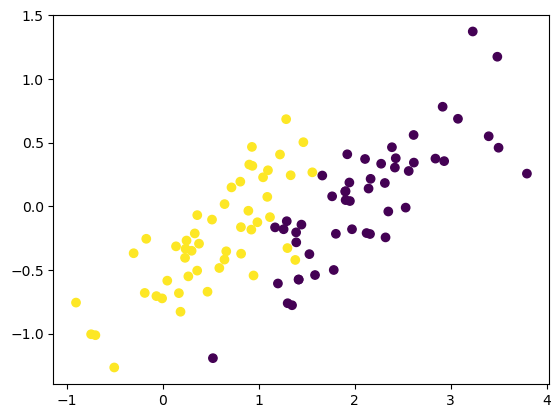

In [6]:
plt.scatter(U12[:,0], U12[:,1], c=Y12)
plt.show()

0.96


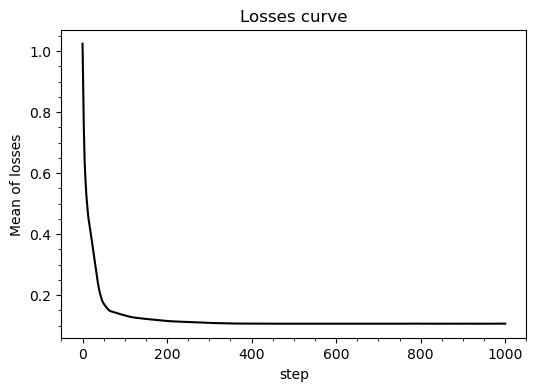

In [9]:
hinge_loss = loss.MarginLoss(funcs.Hinge(1))
softhinge_loss = loss.MarginLoss(funcs.SoftHinge_Exp(10.0))

linmod = models.LinearModel(2)
alg = regr.regression(U12, Y12, linmod, hinge_loss, h=0.1)
print(metrics.accuracy_score(np.sign(linmod.evaluate(U12)),Y12))

plots.plot_losses(alg)
plt.show()

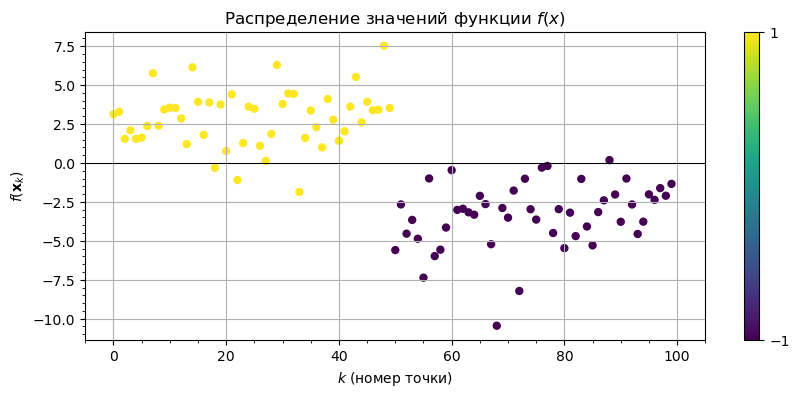

In [10]:
plt.figure(figsize=(10,4))
plots.plot_cls_function(linmod, U12, Y12)
plt.show()

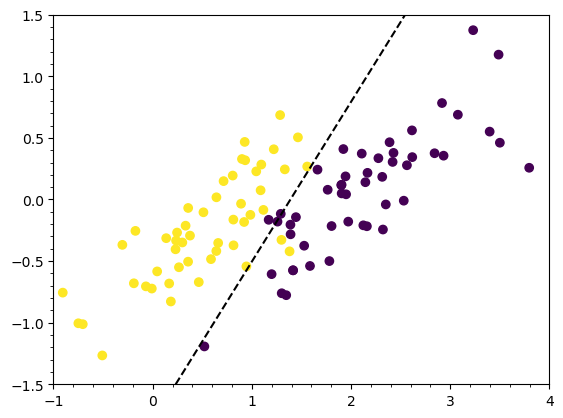

In [10]:
plt.scatter(U12[:,0], U12[:,1], c=Y12)
plots.draw_line_by_equation(linmod, (-1.0,4.0,-1.5,1.5))
plt.minorticks_on()
plt.show()